<a href="https://colab.research.google.com/github/bhavya26082004/python/blob/main/AD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews[1].csv', nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.info

<bound method DataFrame.info of        Id   ProductId          UserId                      ProfileName  \
0       1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1       2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2       3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3       4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4       5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..    ...         ...             ...                              ...   
995   996  B006F2NYI2  A1D3F6UI1RTXO0                           Swopes   
996   997  B006F2NYI2   AF50D40Y85TV3                          Mike A.   
997   998  B006F2NYI2  A3G313KLWDG3PW                          kefka82   
998   999  B006F2NYI2  A3NIDDT7E7JIFW                  V. B. Brookshaw   
999  1000  B006F2NYI2  A132DJVI37RB4X                        Scottdrum   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                       1                       1      5  1303862400   
1                       0                       0      1  1346976000   
2                       1                       1      4  1219017600   
3                       3                       3      2  1307923200   
4                       0                       0      5  1350777600   
..                    ...                     ...    ...         ...   
995                     1                       1      5  1331856000   
996                     1                       1      5  1328140800   
997                     1                       1      5  1324252800   
998                     1                       2      1  1336089600   
999                     2                       5      2  1332374400   

                                    Summary  \
0                     Good Quality Dog Food   
1                         Not as Advertised   
2                     "Delight" says it all   
3                            Cough Medicine   
4                               Great taffy   
..                                      ...   
995                         Hot & Flavorful   
996  Great Hot Sauce and people who run it!   
997               this sauce is the shiznit   
998                                 Not Hot   
999                   Not hot, not habanero   

                                                  Text  
0    I have bought several of the Vitality canned d...  
1    Product arrived labeled as Jumbo Salted Peanut...  
2    This is a confection that has been around a fe...  
3    If you are looking for the secret ingredient i...  
4    Great taffy at a great price.  There was a wid...  
..                                                 ...  
995  BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...  
996  Man what can i say, this salsa is the bomb!! i...  
997  this sauce is so good with just about anything...  
998  Not hot at all. Like the other low star review...  
999  I have to admit, I was a sucker for the large ...  

[1000 rows x 10 columns]>

In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


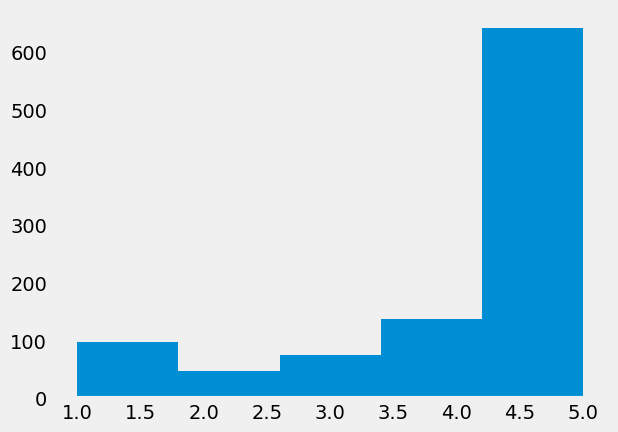

Score
1     98
2     47
3     75
4    138
5    642
Name: Id, dtype: int64


In [30]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5, grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)


In [31]:
score_1 = reviews[reviews['Score'] == 1].sample(n=47)
score_2 = reviews[reviews['Score'] == 2].sample(n=47)
score_3 = reviews[reviews['Score'] == 3].sample(n=47)
score_4 = reviews[reviews['Score'] == 4].sample(n=47)
score_5 = reviews[reviews['Score'] == 5].sample(n=47)

In [32]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

print(reviews_sample.groupby('Score').count().Id)

Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


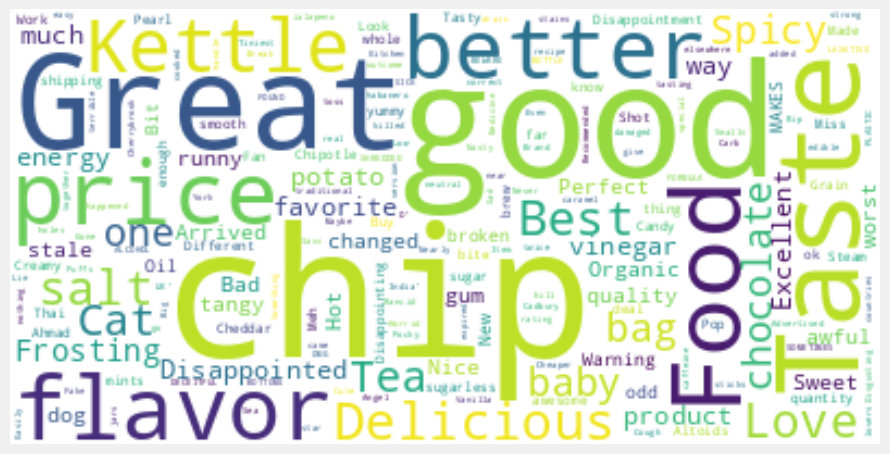

In [33]:
from wordcloud import WordCloud

reviews_str = " ".join(reviews_sample["Summary"].to_numpy())

wordcloud = WordCloud(background_color="white").generate(reviews_str)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

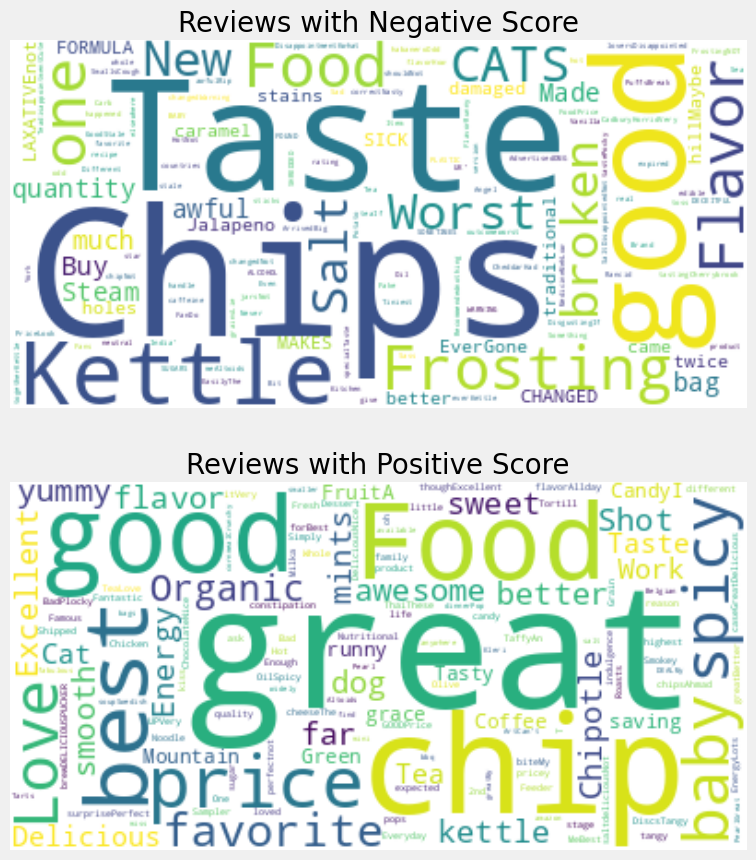

In [35]:
wordcloud = WordCloud(background_color="white") \
   .generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color="white") \
   .generate(positive_reviews_str)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Score', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Score', fontsize=20)
plt.show()

In [36]:
!pip install vaderSentiment

In [37]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')

cp = sns.color_palette()

analyzer = SentimentIntensityAnalyzer()

emptyline=[]
for row in df['Text']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)

In [38]:
df_sentiment = pd.DataFrame(emptyline)
df_sentiment.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [39]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiment], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880


In [40]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0, 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive


Sentiment
Positive    917
Negative     83
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

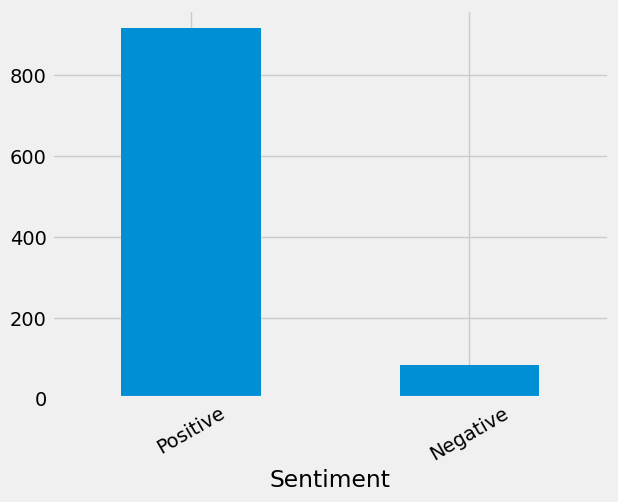

In [41]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)